# AGN Emission


## Imports

In [9]:
import numpy as np
from lightning.agn import AGNModel
from lightning.xray.agn import AGNPlaw, Qsosed
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('lightning.plots.style.lightning-serif')
%matplotlib inline

## Initialize Model

In [2]:
wave_grid = np.logspace(np.log10(0.0912),
                        np.log10(100),
                        200)
filter_labels = ['SDSS_u', 'SDSS_g', 'SDSS_r', 'SDSS_i', 'SDSS_z',
                 'MOIRCS_J', 'MOIRCS_H', 'MOIRCS_Ks',
                 'IRAC_CH1', 'IRAC_CH2', 'IRAC_CH3', 'IRAC_CH4',
                 'MIPS_CH1']

redshift = 0.0

agn = AGNModel(filter_labels,
               redshift=redshift,
               wave_grid=wave_grid,
               polar_dust=True)

In [3]:
agn.print_params(verbose=True)


SKIRTOR-AGN
        Parameter Lo Hi                                       Description
----------------- -- -- -------------------------------------------------
SKIRTOR_log_L_AGN  6 15    Integrated luminosity of the model in log Lsun
 SKIRTOR_cosi_AGN  0  1    Cosine of the inclination to the line of sight
   SKIRTOR_tau_97  3 11 Edge-on optical depth of the torus at 9.7 microns
  polar_dust_tauV  0  3 V-band optical depth of the polar dust extinction

Total parameters: 4


## Plots with Varying Model Parameters

In [14]:
def multi_model_plot(mdl, params, cmap='YlOrRd', labels=None, ax=None):

    Nmod = params.shape[0]
    if labels is None: labels = [None for i in np.arange(Nmod)]

    lnu = mdl.get_model_lnu_hires(params)

    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure

    cm = mpl.colormaps[cmap]
    colors = cm(np.linspace(0.2, 0.9, Nmod))

    for i in np.arange(Nmod):

        ax.plot(agn.wave_grid_rest,
                agn.nu_grid_obs * lnu[i,:],
                color=colors[i],
                label=labels[i])

    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.set_xlabel(r'Rest-Frame Wavelength [$\rm \mu m$]')
    ax.set_ylabel(r'$\nu L_{\nu}\ [\rm L_{\odot}]$')

    if labels is not None: ax.legend(loc = 'best')

    return fig, ax
    

### Varying Inclination

The effects of the changing inclination are most pronounced at the sort of edge case, where $i \approx 90 - \Delta$, where $\Delta$ is the angle that the dusty torus cone extends upward from the plane of the accretion disk. It will often suffice to fit with inclination fixed or bounded to a small range (in fact this is the recommended strategy for e.g. Cigale) and compare the 'Type 1' and 'Type 2' fits.

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Rest-Frame Wavelength [$\\rm \\mu m$]', ylabel='$\\nu L_{\\nu}\\ [\\rm L_{\\odot}]$'>)

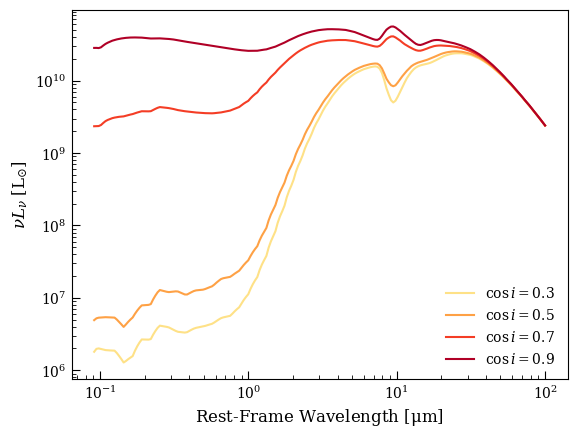

In [15]:
params = np.array([[11, 0.3, 7, 0.1],
                   [11, 0.5, 7, 0.1],
                   [11, 0.7, 7, 0.1],
                   [11, 0.9, 7, 0.1]])

multi_model_plot(agn,
                 params,
                 labels=[r'$\cos i = %.1f$' % p[1] for p in params])

### Varying $\tau_{9.7}$ at Fixed Inclination

Unless we have *really* good data across the MIR it seems unlikely that we could constrain both the inclination and optical depth.

Text(0.5, 1.0, "'Type 2' ($\\cos i = 0.3$) AGN")

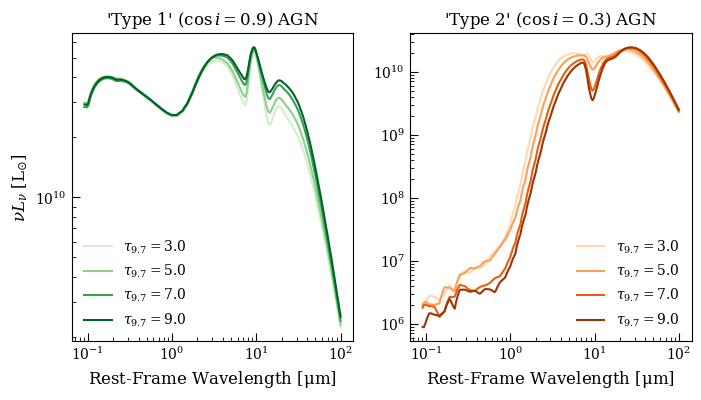

In [16]:
params1 = np.array([[11, 0.9, 3, 0.1],
                    [11, 0.9, 5, 0.1],
                    [11, 0.9, 7, 0.1],
                    [11, 0.9, 9, 0.1]])

params2 = np.array([[11, 0.3, 3, 0.1],
                    [11, 0.3, 5, 0.1],
                    [11, 0.3, 7, 0.1],
                    [11, 0.3, 9, 0.1]])

fig, axs = plt.subplots(1,2, figsize=(8,4))

multi_model_plot(agn,
                 params1,
                 cmap='Greens',
                 labels=[r'$\tau_{9.7} = %.1f$' % p[2] for p in params1],
                 ax=axs[0]
                 )

axs[0].set_title(r"'Type 1' ($\cos i = 0.9$) AGN")

multi_model_plot(agn,
                 params2,
                 cmap='Oranges',
                 labels=[r'$\tau_{9.7} = %.1f$' % p[2] for p in params2],
                 ax=axs[1]
                 )
axs[1].set_ylabel('')
axs[1].set_title(r"'Type 2' ($\cos i = 0.3$) AGN")

### Varying $\tau^{\rm pol}_V$ at Fixed Inclination

An optically-thick polar-dust obscurer can attenuate nearly all of the optical light from the face-on, 'Type 1' view. In the side-on, 'Type 2' view, we see none of that extra attenuation, but we do still see the isotropic, graybody dust re-emission of that attenuated optical light.

Text(0.5, 1.0, "'Type 2' ($\\cos i = 0.3$) AGN")

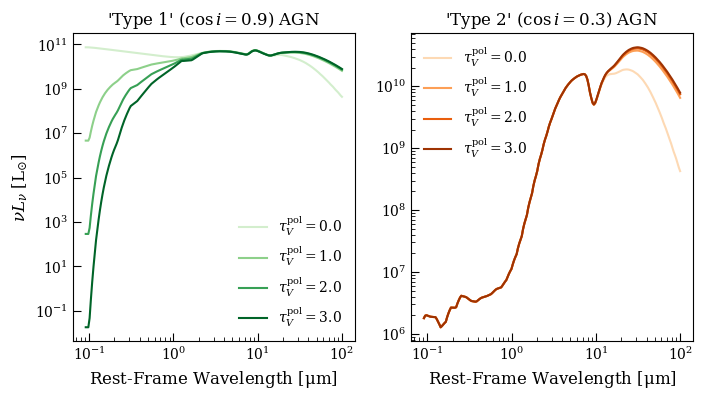

In [17]:
params1 = np.array([[11, 0.9, 7, 0.0],
                    [11, 0.9, 7, 1],
                    [11, 0.9, 7, 2],
                    [11, 0.9, 7, 3]])

params2 = np.array([[11, 0.3, 7, 0.0],
                    [11, 0.3, 7, 1],
                    [11, 0.3, 7, 2],
                    [11, 0.3, 7, 3]])

fig, axs = plt.subplots(1,2, figsize=(8,4))

multi_model_plot(agn,
                 params1,
                 cmap='Greens',
                 labels=[r'$\tau^{\rm pol}_{V} = %.1f$' % p[3] for p in params1],
                 ax=axs[0]
                 )

axs[0].set_title(r"'Type 1' ($\cos i = 0.9$) AGN")

multi_model_plot(agn,
                 params2,
                 cmap='Oranges',
                 labels=[r'$\tau^{\rm pol}_{V} = %.1f$' % p[3] for p in params2],
                 ax=axs[1]
                 )
axs[1].set_ylabel('')
axs[1].set_title(r"'Type 2' ($\cos i = 0.3$) AGN")

In principle the "polar dust extinction" does not need to make many assumptions about the physical location of the obscuring dust. With a few changes to the shape of the attenuation curve and the temperature of the re-emission we could use this component to flexibly model "extra" ISM attenuation of a Type 1 AGN. Options for doing this right now are limited but would not be super difficult to expand.

## X-ray AGN Model

In [12]:
filter_labels = ['XRAY_0.5_2.0_keV', 'XRAY_2.0_7.0_keV']
arf = Table.read('../photometry/cdfn_near_aimpoint.arf')

xray_model_pl = AGNPlaw(filter_labels,
                        arf,
                        np.array([1,1]),
                        0.0,
                        lum_dist=10)

xray_model_qso = Qsosed(filter_labels,
                        arf,
                        np.array([1,1]),
                        0.0,
                        lum_dist=10)

In [13]:
xray_model_pl.print_params(verbose=True)
xray_model_qso.print_params(verbose=True)


AGN-Plaw
 Parameter   Lo  Hi                       Description
---------- ---- --- ---------------------------------
  PhoIndex -2.0 9.0                      Photon index
LR17_delta -inf inf Deviation from LR17 relationship.

Total parameters: 2

QSOSED
 Parameter   Lo   Hi                               Description
---------- ---- ---- -----------------------------------------
log_M_SMBH  5.0 10.0 log10 of the supermassive black hole mass
  log_mdot -1.5  0.3              log10 of the Eddington ratio

Total parameters: 2


While practically the deviation from the LR17 relationship can vary between plus and minus infinity, in practice one should probably set it to follow a uniform prior between say, 2 sigma of the scatter in the relationship (or to a normal prior having the scatter), unless one anticipates having e.g. an "X-ray weak" source and wants to fit for delta in an unbiased way.

Because the normalization of the power law model is set by the overall normalization of the UV-IR AGN model, the model functions (`get_model_lnu_hires`, `get_model_lnu`, etc.) need to take the UV-IR model and its parameters as inputs. This isn't something you need to worry about in practice if you're just using the Lightning interface.

Text(0, 0.5, '$\\nu L_{\\nu}\\ [\\rm L_{\\odot}]$')

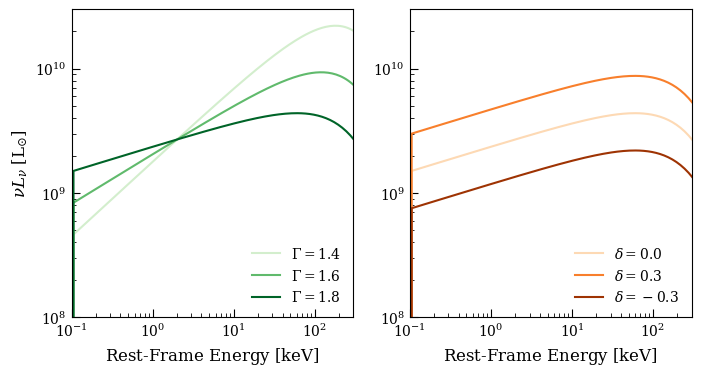

In [26]:
params1 = np.array([[1.4, 0.0],
                    [1.6, 0.0],
                    [1.8, 0.0]])

params2 = np.array([[1.8, 0.0],
                    [1.8, 0.3],
                    [1.8,-0.3]])

agn_params = np.array([[11.0, 0.6, 7.0, 0.1],
                       [11.0, 0.6, 7.0, 0.1],
                       [11.0, 0.6, 7.0, 0.1]])



lnu_pl1, _ = xray_model_pl.get_model_lnu_hires(params1,
                                               agn,
                                               agn_params)

lnu_pl2, _ = xray_model_pl.get_model_lnu_hires(params2,
                                               agn,
                                               agn_params)


fig, axs = plt.subplots(1,2, figsize=(8,4))

cm1 = mpl.colormaps['Greens']
colors1 = cm1(np.linspace(0.2, 0.9, 3))

cm2 = mpl.colormaps['Oranges']
colors2 = cm2(np.linspace(0.2, 0.9, 3))

for i in range(3):

    axs[0].plot(xray_model_pl.energ_grid_rest, 
                xray_model_pl.nu_grid_obs * lnu_pl1[i,:],
                color=colors1[i],
                label=r'$\Gamma = %.1f$' % (params1[i,0]))

    axs[1].plot(xray_model_pl.energ_grid_rest, 
                xray_model_pl.nu_grid_obs * lnu_pl2[i,:],
                color=colors2[i],
                label=r'$\delta = %.1f$' % (params2[i,1]))


axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[0].set_xlim(1e-1, 300)
axs[1].set_xlim(1e-1, 300)

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_ylim(1e8, 3e10)
axs[1].set_ylim(1e8, 3e10)


axs[0].legend(loc='lower right')
axs[1].legend(loc='lower right')

axs[0].set_xlabel(r'Rest-Frame Energy [$\rm keV$]')
axs[1].set_xlabel(r'Rest-Frame Energy [$\rm keV$]')
axs[0].set_ylabel(r'$\nu L_{\nu}\ [\rm L_{\odot}]$')


It's a power law. The luminosity parameter is fixed at $10^{11}~{\rm L_{\odot}}$ here. Note that since the LR17 relationship is between the intrinsic 2500 Angstrom luminosity and 2 keV luminosity, the inclination angle doesn't factor in here. While this ignores any X-ray anisotropy (see discussions of such in the XCigale docs, for example) the effects of anisotropy would be swamped by the $\delta$ parameter.

Now, an important distinction: since the QSOSED model *is not* normalized by the UV-IR model, it doesn't take the UV-IR model or its parameters as inputs.

Text(0, 0.5, '$\\nu L_{\\nu}\\ [\\rm L_{\\odot}]$')

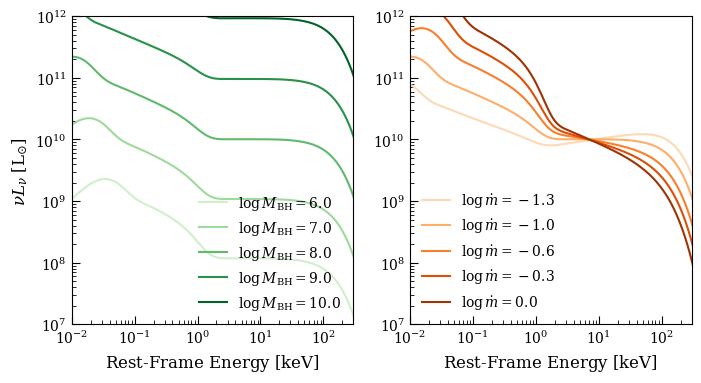

In [37]:
params1 = np.array([[6.0, -1.0],
                    [7.0, -1.0],
                    [8.0, -1.0],
                    [9.0, -1.0],
                    [10.0, -1.0]])

params2 = np.array([[8.0, -1.3],
                    [8.0, -1.0],
                    [8.0, -0.6],
                    [8.0, -0.3],
                    [8.0,  0.0]])

# agn_params = np.array([[11.0, 0.6, 7.0, 0.1],
#                        [11.0, 0.6, 7.0, 0.1],
#                        [11.0, 0.6, 7.0, 0.1]])



lnu_pl1, _ = xray_model_qso.get_model_lnu_hires(params1)

lnu_pl2, _ = xray_model_qso.get_model_lnu_hires(params2)


fig, axs = plt.subplots(1,2, figsize=(8,4))

cm1 = mpl.colormaps['Greens']
colors1 = cm1(np.linspace(0.2, 0.9, 5))

cm2 = mpl.colormaps['Oranges']
colors2 = cm2(np.linspace(0.2, 0.9, 5))

for i in range(5):

    axs[0].plot(xray_model_qso.energ_grid_rest, 
                xray_model_qso.nu_grid_obs * lnu_pl1[i,:],
                color=colors1[i],
                label=r'$\log M_{\rm BH} = %.1f$' % (params1[i,0]))

    axs[1].plot(xray_model_qso.energ_grid_rest, 
                xray_model_qso.nu_grid_obs * lnu_pl2[i,:],
                color=colors2[i],
                label=r'$\log \dot m = %.1f$' % (params2[i,1]))


axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[0].set_xlim(1e-2, 300)
axs[1].set_xlim(1e-2, 300)

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_ylim(1e7, 1e12)
axs[1].set_ylim(1e7, 1e12)


axs[0].legend(loc='lower right')
axs[1].legend(loc='lower left')

axs[0].set_xlabel(r'Rest-Frame Energy [$\rm keV$]')
axs[1].set_xlabel(r'Rest-Frame Energy [$\rm keV$]')
axs[0].set_ylabel(r'$\nu L_{\nu}\ [\rm L_{\odot}]$')


There's significantly more structure to the model, since it is a physical model -- you can see the bump from the disk component at low energies, with a multi-temperature comptonized spectrum at higher energies. The model cuts off at slightly lower energies than the power law (which has an exponential cutoff at 300 keV). 

It's worth looking at the X-ray AGN models in context with the UV-IR models, as well. The easiest way to do this is to use the main Lightning interface, and to just set all the SFH coefficients to 0 such that we a pure AGN model - note that this is an easy way to fit a pure AGN model to your data, if you so choose.

In [70]:
from lightning import Lightning
import astropy.constants as const
import astropy.units as u

hc_um = (const.c * const.h).to(u.micron * u.keV).value
lam_05 = hc_um / 0.5
lam_70 = hc_um / 7.0
xray_wave_grid = np.logspace(np.log10(lam_70), np.log10(lam_05), 200) / (1 + redshift)

lgh_pl = Lightning(filter_labels, lum_dist=10,
                   agn_emission=True,
                   agn_polar_dust=True,
                   dust_emission=False,
                   atten_type='Calzetti',
                   xray_agn_emission='AGN-Plaw',
                   xray_arf=arf,
                   xray_mode='counts',
                   xray_wave_grid=xray_wave_grid,
                   xray_exposure=np.array([1,1]))

lgh_qso = Lightning(filter_labels, lum_dist=10,
                   agn_emission=True,
                   agn_polar_dust=True,
                   dust_emission=False,
                   atten_type='Calzetti',
                   xray_agn_emission='QSOSED',
                   xray_arf=arf,
                   xray_mode='counts',
                   xray_wave_grid=xray_wave_grid,
                   xray_exposure=np.array([1,1]))

In [71]:
lgh_pl.print_params(verbose=True)
print()
lgh_qso.print_params(verbose=True)


Piecewise-Constant
Parameter  Lo  Hi              Description
--------- --- --- ------------------------
    psi_1 0.0 inf SFR in stellar age bin 1
    psi_2 0.0 inf SFR in stellar age bin 2
    psi_3 0.0 inf SFR in stellar age bin 3
    psi_4 0.0 inf SFR in stellar age bin 4
    psi_5 0.0 inf SFR in stellar age bin 5

Pegase-Stellar
Parameter    Lo  Hi                                      Description
--------- ----- --- ------------------------------------------------
     Zmet 0.001 0.1 Metallicity (mass fraction, where solar = 0.020)

Calzetti
     Parameter  Lo  Hi                      Description
-------------- --- --- --------------------------------
calz_tauV_diff 0.0 inf Optical depth of the diffuse ISM

SKIRTOR-AGN
        Parameter Lo Hi                                       Description
----------------- -- -- -------------------------------------------------
SKIRTOR_log_L_AGN  6 15    Integrated luminosity of the model in log Lsun
 SKIRTOR_cosi_AGN  0  1    Cosine of the in

Text(0.5, 1.0, "'Type 2' ($\\cos i = 0.3$) AGN")

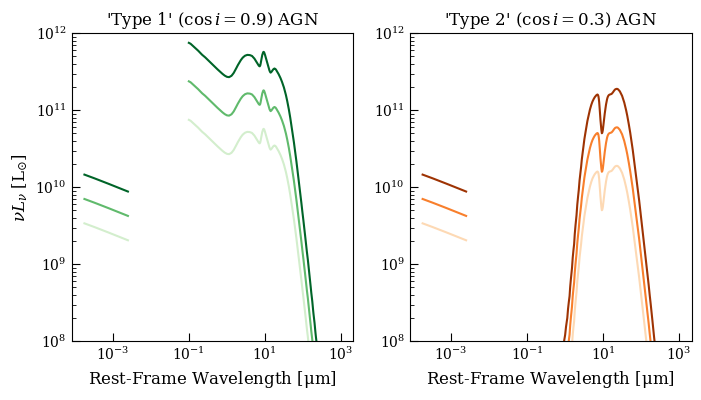

In [68]:
params = np.array([[0, 0, 0, 0, 0, 0.02, 0.0, 11, 0.9, 7, 0.0, 1.8, 0.0],
                   [0, 0, 0, 0, 0, 0.02, 0.0, 11.5, 0.9, 7, 0.0, 1.8, 0.0],
                   [0, 0, 0, 0, 0, 0.02, 0.0, 12.0, 0.9, 7, 0.0, 1.8, 0.0]])

lnu, _ = lgh_pl.get_model_lnu_hires(params)
lnu_x, _ = lgh_pl.get_xray_model_lnu_hires(params)

cm1 = mpl.colormaps['Greens']
colors1 = cm1(np.linspace(0.2, 0.9, 3))

fig, axs = plt.subplots(1,2, figsize=(8,4))

for i in range(3):
    axs[0].plot(lgh_pl.wave_grid_rest, lgh_pl.nu_grid_obs * lnu[i,:], color=colors1[i])
    axs[0].plot(lgh_pl.xray_wave_grid_rest, lgh_pl.xray_nu_grid_obs * lnu_x[i,:], color=colors1[i])

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylim(1e8, 1e12)

params = np.array([[0, 0, 0, 0, 0, 0.02, 0.0, 11, 0.3, 7, 0.0, 1.8, 0.0],
                   [0, 0, 0, 0, 0, 0.02, 0.0, 11.5, 0.3, 7, 0.0, 1.8, 0.0],
                   [0, 0, 0, 0, 0, 0.02, 0.0, 12.0, 0.3, 7, 0.0, 1.8, 0.0]])

lnu, _ = lgh_pl.get_model_lnu_hires(params)
lnu_x, _ = lgh_pl.get_xray_model_lnu_hires(params)

cm2 = mpl.colormaps['Oranges']
colors2 = cm2(np.linspace(0.2, 0.9, 3))

for i in range(3):
    axs[1].plot(lgh_pl.wave_grid_rest, lgh_pl.nu_grid_obs * lnu[i,:], color=colors2[i])
    axs[1].plot(lgh_pl.xray_wave_grid_rest, lgh_pl.xray_nu_grid_obs * lnu_x[i,:], color=colors2[i])

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_ylim(1e8, 1e12)


axs[0].set_xlabel(r'Rest-Frame Wavelength [$\rm \mu m$]')
axs[1].set_xlabel(r'Rest-Frame Wavelength [$\rm \mu m$]')
axs[0].set_ylabel(r'$\nu L_{\nu}\ [\rm L_{\odot}]$')
axs[0].set_title(r"'Type 1' ($\cos i = 0.9$) AGN")
axs[1].set_ylabel('')
axs[1].set_title(r"'Type 2' ($\cos i = 0.3$) AGN")

As mentioned above, the definition of our model is such that the Type 1 and Type 2 viewing angles produce the same X-ray spectrum: the X-ray spectrum is isotropic.

Text(0.5, 1.0, "'Type 2' ($\\cos i = 0.3$) AGN")

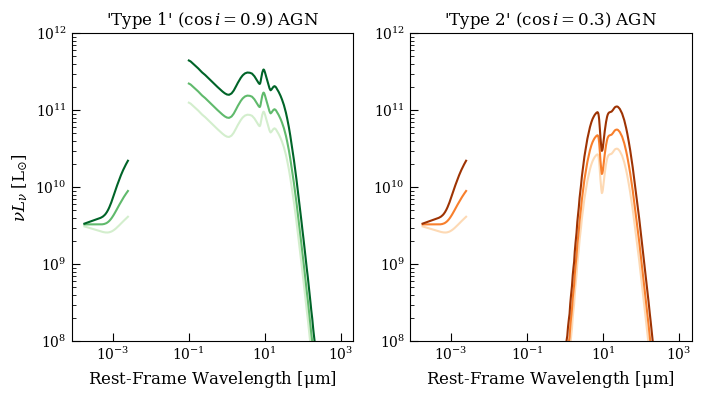

In [75]:
params = np.array([[0, 0, 0, 0, 0, 0.02, 0.0, 11.0, 0.9, 7, 0.0, 7.5, -1.3],
                   [0, 0, 0, 0, 0, 0.02, 0.0, 11.0, 0.9, 7, 0.0, 7.5, -1.0],
                   [0, 0, 0, 0, 0, 0.02, 0.0, 11.0, 0.9, 7, 0.0, 7.5, -0.6]])

lnu, _ = lgh_qso.get_model_lnu_hires(params)
lnu_x, _ = lgh_qso.get_xray_model_lnu_hires(params)

cm1 = mpl.colormaps['Greens']
colors1 = cm1(np.linspace(0.2, 0.9, 3))

fig, axs = plt.subplots(1,2, figsize=(8,4))

for i in range(3):
    axs[0].plot(lgh_qso.wave_grid_rest, lgh_qso.nu_grid_obs * lnu[i,:], color=colors1[i])
    axs[0].plot(lgh_qso.xray_wave_grid_rest, lgh_qso.xray_nu_grid_obs * lnu_x[i,:], color=colors1[i])

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylim(1e8, 1e12)

params = np.array([[0, 0, 0, 0, 0, 0.02, 0.0, 11.0, 0.3, 7, 0.0, 7.5, -1.3],
                   [0, 0, 0, 0, 0, 0.02, 0.0, 11.0, 0.3, 7, 0.0, 7.5, -1.0],
                   [0, 0, 0, 0, 0, 0.02, 0.0, 11.0, 0.3, 7, 0.0, 7.5, -0.6]])

lnu, _ = lgh_qso.get_model_lnu_hires(params)
lnu_x, _ = lgh_qso.get_xray_model_lnu_hires(params)

cm2 = mpl.colormaps['Oranges']
colors2 = cm2(np.linspace(0.2, 0.9, 3))

for i in range(3):
    axs[1].plot(lgh_qso.wave_grid_rest, lgh_qso.nu_grid_obs * lnu[i,:], color=colors2[i])
    axs[1].plot(lgh_qso.xray_wave_grid_rest, lgh_qso.xray_nu_grid_obs * lnu_x[i,:], color=colors2[i])

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_ylim(1e8, 1e12)


axs[0].set_xlabel(r'Rest-Frame Wavelength [$\rm \mu m$]')
axs[1].set_xlabel(r'Rest-Frame Wavelength [$\rm \mu m$]')
axs[0].set_ylabel(r'$\nu L_{\nu}\ [\rm L_{\odot}]$')
axs[0].set_title(r"'Type 1' ($\cos i = 0.9$) AGN")
axs[1].set_ylabel('')
axs[1].set_title(r"'Type 2' ($\cos i = 0.3$) AGN")

At fixed mass, increasing the Eddington ratio increases the overall luminosity of the AGN model. Again, the X-ray spectrum is isotropic. We can see also here that one of the weaknesses of our implementation of this model is that we can really only produce a pretty narrow range of spectral slopes (compared to the power law model, which is flexible by definition) given the narrow range of Eddington ratios available to the model.